[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/02.regression/a.regression.ipynb)

In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math # for sqrt
from sklearn.model_selection import cross_val_score, KFold
import pickle # to serialize/deserialize objects

from statistics import mean


## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression # In the course library
import feature_engineering # From the course library

--2024-05-14 08:54:32--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2024-05-14 08:54:33 (20.0 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2024-05-14 08:54:33--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected

In [2]:
savefigures=False

In [3]:
dataset_to_use = 'A'
mydatasets_folder = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/"
filename = "df."+ dataset_to_use+"_2.csv"
complete_name = mydatasets_folder+filename
!wget $complete_name

--2024-05-14 08:54:35--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315832 (308K) [text/plain]
Saving to: ‘df.A_2.csv’

df.A_2.csv          100%[===================>] 308.43K  --.-KB/s    in 0.1s    

2024-05-14 08:54:36 (2.88 MB/s) - ‘df.A_2.csv’ saved [315832/315832]



In [4]:
!ls

andrea_models.py  df.A_2.csv  feature_engineering.py  __pycache__  sample_data


In [5]:
df = pd.read_csv(filename)

In [6]:
df.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372,79344,192.168.1.190,173.194.55.23,QUIC,29,57,...,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625,52973,192.168.1.190,74.125.155.199,QUIC,4,36,...,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056,34178,192.168.1.190,74.125.155.201,TCP,16,23,...,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377,36821,192.168.1.190,172.217.135.40,0,0,0,...,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900,104389,192.168.1.190,173.194.184.103,QUIC,9,77,...,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 207 columns):
 #    Column               Dtype  
---   ------               -----  
 0    RelativeTime         float64
 1    PacketsSent          int64  
 2    PacketsReceived      int64  
 3    BytesSent            int64  
 4    BytesReceived        int64  
 5    IPSrc0               object 
 6    IPDst0               object 
 7    Protocol0            object 
 8    PacketsSent0         int64  
 9    PacketsReceived0     int64  
 10   BytesSent0           int64  
 11   BytesReceived0       int64  
 12   IPSrc1               object 
 13   IPDst1               object 
 14   Protocol1            object 
 15   PacketsSent1         int64  
 16   PacketsReceived1     int64  
 17   BytesSent1           int64  
 18   BytesReceived1       int64  
 19   IPSrc2               object 
 20   IPDst2               object 
 21   Protocol2            object 
 22   PacketsSent2         int64  
 23   PacketsReceiv

Let's study the dependency between `label` and `KBytesReceived`

Let's first plot the data as they are, using a scatterplot.

See [mathplotlib documentation](https://matplotlib.org/tutorials/introductory/lifecycle.html) for more info (optional).

[(-100.0, 1200.0),
 (-100.0, 1200.0),
 Text(0, 0.5, 'label_num'),
 Text(0.5, 0, 'KBytes received')]

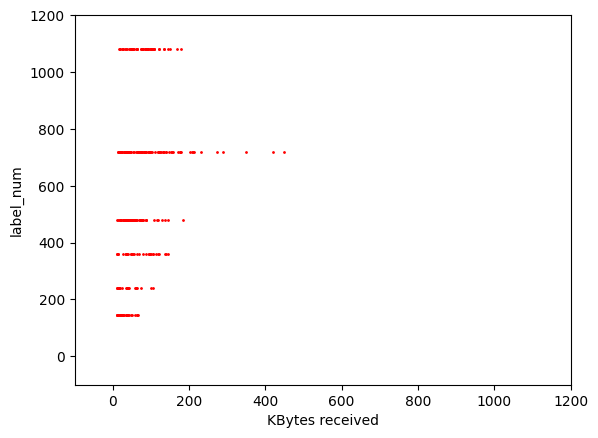

In [8]:
fig, ax = plt.subplots() # This creates just a canvas
ax.scatter(df['KBytesReceived'],df['label_num'],color='red',
           s=1, label='all samples') # ax is the actual figure

# Customize the plot
ax.set(xlim=[-100,1200], ylim=[-100,1200], ylabel="label_num",
      xlabel="KBytes received")

# Save files in Google Drive (skip this)

Run this section only if you want to save the figure in your google drive.

We now save the figure in googledrive. We first mount the google drive volume

In [9]:
if savefigures:
  # Inspired by https://colab.research.google.com/drive/1Eh0CgryaZnqWV8Jv4YzZMjXJXiDivzKY#scrollTo=u4X-zdyC0U6-

  # keep these variables always the same
  from google.colab import drive
  mount_point = '/content/gdrive'
  drive.mount(mount_point, force_remount=True)


In [10]:
if savefigures:
  drive_path = mount_point+'/My Drive/'

  print("This is my google drive")
  !ls "$drive_path"

I save the figure in one of my folders

In [11]:
if savefigures:
  my_path = drive_path + 'tsp/teaching/data-science-for-networks/img-from-code/02.regression/'
  filename = my_path+"scatter.pdf"
  fig.savefig(filename)

# Train-test-split

We now divide the dataframe in a training and a test dataframe. By default, the dataset is split randomly (which is good).

In [12]:
df_train, df_test = train_test_split(df, test_size=0.3)
df_test.head()

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,...,BufferValid,KBytesReceived,label,label_num,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
268,3.9,54,107,5594,145882,192.168.1.190,74.125.159.73,QUIC,54,107,...,True,145.882,q480p,480,4.982798,4.007333,4.682131,8.629629,11.890560,0.007519
108,5.0,31,62,2524,86304,192.168.1.190,172.217.129.9,QUIC,31,62,...,True,86.304,q1080p,1080,4.457876,3.465736,4.143135,7.833996,11.365643,0.005629
9,6.1,14,21,1211,21595,192.168.1.190,173.194.191.9,0,0,0,...,True,21.595,q720p,720,3.072462,2.708050,3.091042,7.100027,9.980263,0.002304
46,11.4,15,30,1228,41760,192.168.1.190,173.194.162.26,QUIC,15,30,...,True,41.760,q720p,720,3.731939,2.772589,3.433987,7.113956,10.639718,0.007770
289,7.5,6,8,1110,11136,192.168.1.190,173.194.7.72,QUIC,6,8,...,True,11.136,q240p,240,2.410183,1.945910,2.197225,7.013016,9.318028,0.004835


Let's split the dataset in 70% training set, 30% test set.

Try to run the code above multiple times.

What do you observe? Is it a problem? How do you solve it?

To achieve reproducibility, set the seed with `random_state`.

In [13]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=19)
df_test.head()

print('Training samples ', df_train.shape[0], '; Test samples ', df_test.shape[0])

Training samples  204 ; Test samples  88


## Univariate Linear Regression

**Goal**: Predict `label_num` based on `KBytesReceived`

In [14]:
df_train[['KBytesReceived','label_num']]

,KBytesReceived,label_num
211,135.024,1080
261,85.044,1080
150,137.403,480
31,48.720,360
189,86.304,720
...,...,...
159,46.066,720
19,41.931,480
245,66.958,720
110,41.752,720


Let's separate the independent variables $X$ from the dependent variables $y$

In [15]:
# Scikit learn models expect matrices. We first transform
# the dataframe into an array
X_train = df_train[['KBytesReceived'] ].values

# Scikit learn models expect matrices with multiple
# rows and columns as X. X_train has instead just one column
# ==> The following code is necessary
X_train = X_train.reshape(-1,1)

y_train = df_train['label_num'].values


# Do the same for the test dataset
X_test = df_test[[ 'KBytesReceived'] ].values.reshape(-1,1)
y_test = df_test['label_num'].values

Let's train our first supervised learning model: an Ordinary Least Squares model.

Note: the main library for machine learning in Python is `scikit learn`. However `sklearn.LinearRegression` is quite poor, as it does not provide p-values and other information.

An alternative library to `sklearn` exists, which is called `statsmodel` is better, but its interface is different from the other models of `sklearn`.

I prepared the function `andrea_models.AndreaLinearRegression`, important at the beginning, to combine the best of `sklearn.LinearRegression` and `statsmodel`: it has tje same interface of `scikit learn` and the additional information of `statsmodel`.

In [16]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=['KBytesReceived'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     15.70
Date:                Tue, 14 May 2024   Prob (F-statistic):           0.000103
Time:                        08:54:38   Log-Likelihood:                -1445.2
No. Observations:                 204   AIC:                             2894.
Df Residuals:                     202   BIC:                             2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        519.5636     33.254     15.

Now we have a trained model $h_{\theta*}(\cdot)$ stored in `model`. We can use it to predict new values.

In [17]:
newKBytesReceivedSamples = np.array([257, 524, 613, 223]).reshape(-1,1)


predictedLabels = model.predict(newKBytesReceivedSamples)
predictedLabels

array([ 893.14316416, 1281.2588651 , 1410.63076541,  843.72019101])

To plot the model, we let it predict on an interval

In [18]:
interval = np.arange(-100,1200).reshape(-1,1)
h_values = model.predict(interval)
h_values

array([ 374.20194605,  375.65556291,  377.10917977, ..., 2259.54301016,
       2260.99662702, 2262.45024387])

Let's plot the model. It is constructed so to minimize the distance between the blue points (training samples) and the line

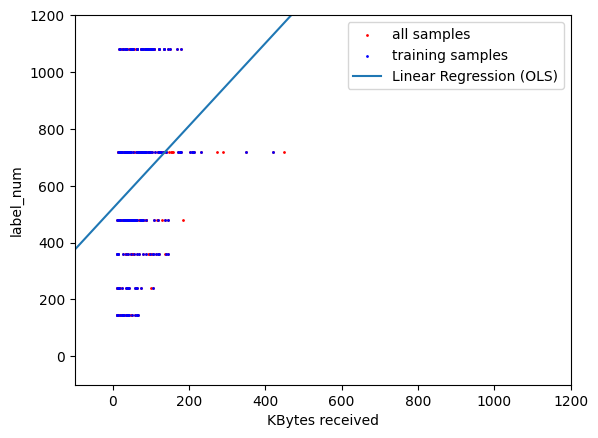

In [19]:
ax.scatter(X_train,y_train,color='blue',s=1,
           label="training samples")

ax.plot(interval,h_values, label="Linear Regression (OLS)")
ax.legend()

fig

In [20]:
# SKIP THIS
if savefigures:
  filename = my_path+"QoE-prediction-OLS.pdf"
  fig.savefig(filename)

Let's evaluate the model on the test set

In [21]:
y_pred = model.predict(X_test)

Let us compare the true test labels and the predicted

In [22]:
pd.DataFrame({'true':y_test,'pred':y_pred})

,true,pred
0,720,599.486394
1,720,578.113865
2,720,584.313541
3,1080,651.086885
4,480,609.283771
...,...,...
83,720,619.890814
84,720,539.797978
85,720,542.783707
86,480,600.564978


Let's compute the Mean Square Error (MSE)

In [23]:
MSE = mean_squared_error(y_test, y_pred)
MSE

75019.04691479652

The Root MSE is easier to understand, since it is in the same unity of measurement of the target

In [24]:
RMSE_one_feature = math.sqrt(MSE)
RMSE_one_feature

273.8960512946408

#### Dependency on the training set

If we change the training set, the model changes as well

In [25]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=2)

X_train = df_train[['KBytesReceived'] ].values.reshape(-1,1)
y_train = df_train['label_num'].values
X_test = df_test[[ 'KBytesReceived'] ].values.reshape(-1,1)
y_test = df_test['label_num'].values


model.fit(X_train, y_train, column_names=['KBytesReceived'])
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     21.00
Date:                Tue, 14 May 2024   Prob (F-statistic):           8.04e-06
Time:                        08:54:39   Log-Likelihood:                -1437.6
No. Observations:                 204   AIC:                             2879.
Df Residuals:                     202   BIC:                             2886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        511.4868     30.856     16.

Note that the coefficients are different. Let's plot it

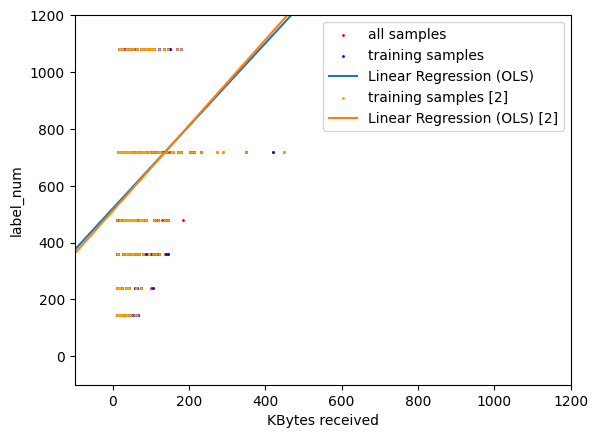

In [26]:
h_values = model.predict(interval)

ax.scatter(X_train,y_train,color='orange',s=1,
           label="training samples [2]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [2]")
ax.legend()
fig

Let's train again a model on a different training set

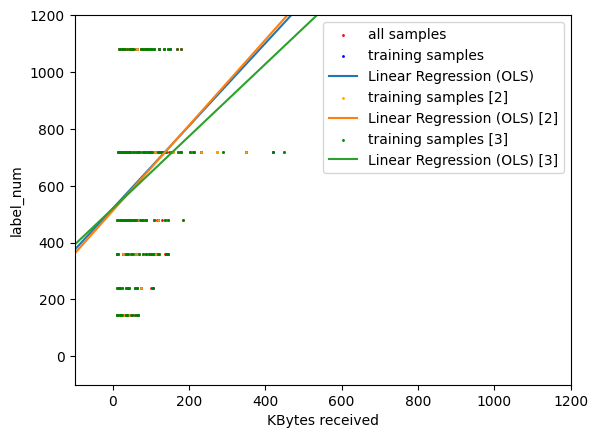

In [27]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=3)

X_train = df_train[['KBytesReceived'] ].values.reshape(-1,1)
y_train = df_train['label_num'].values
X_test = df_test[[ 'KBytesReceived'] ].values.reshape(-1,1)
y_test = df_test['label_num'].values


model.fit(X_train, y_train, column_names=['KBytesReceived'])
h_values = model.predict(interval)
ax.scatter(X_train,y_train,color='green',s=1,
           label="training samples [3]")
ax.plot(interval,h_values, label="Linear Regression (OLS) [3]")
ax.legend()
fig




### Use transformed variables

We observe that the values of `KBytesReceived` are squashed toward small values (we also checked it with a histogram in the last notebook). We have shown in the last notebook that in this case a log transformation can unveil correlation.

We now show that it also improves the model. First, have a look at the plot

[Text(0, 0.5, 'label_num'), Text(0.5, 0, 'KBytesReceived_log')]

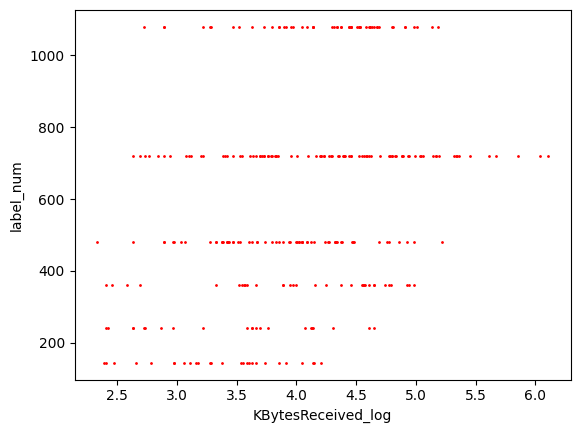

In [28]:
fig, ax = plt.subplots()
ax.scatter(df['KBytesReceived_log'],df['label_num'],color='red',s=1)
ax.set(ylabel="label_num",xlabel="KBytesReceived_log")

Let's train the new model

In [29]:
X_train = df_train[['KBytesReceived_log'] ].values.reshape(-1,1)
X_test = df_test[['KBytesReceived_log'] ].values.reshape(-1,1)

model.fit(X_train, y_train, column_names=['KBytesReceived_log'])

AndreaLinearRegression()

Let's plot the corresponding line

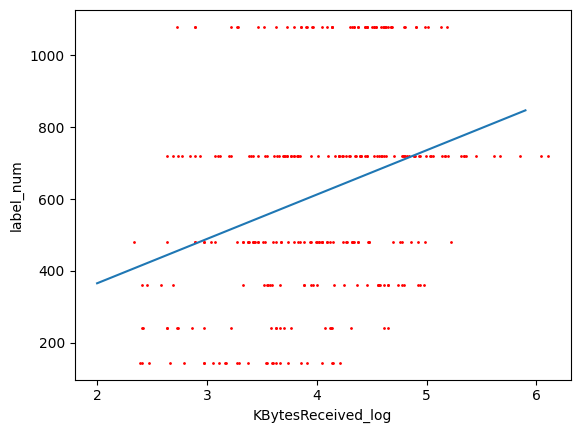

In [30]:
interval = np.arange(2,6,0.1).reshape(-1,1)
h_values = model.predict(interval)
ax.plot(interval, h_values, label="transformed model")
fig

Let's check the test error

In [31]:
y_pred = model.predict(X_test)
RMSE_1_feature = math.sqrt(mean_squared_error(y_test, y_pred) )
RMSE_1_feature

268.5521988534433

Using the logarithmic transformation, we improved the model.

In [32]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     22.84
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.39e-06
Time:                        08:54:42   Log-Likelihood:                -1439.2
No. Observations:                 204   AIC:                             2882.
Df Residuals:                     202   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept            118.3754    104

## Multivariate Linear Regression

Can we improve the test loss if we use other features?

Have a first look at the more correlated features (see notebook on data exploration)

In [33]:
most_corr_feats = \
    feature_engineering.get_most_correlated(
            df_train)
most_corr_feats

BufferProgress     BufferProgress_log    1.0
PacketsReceived13  BytesReceived13       1.0
PacketsReceived12  BytesReceived12       1.0
BytesReceived      KBytesReceived        1.0
EpochTime          StartTime             1.0
                                        ... 
PacketsReceived15  BytesSent_log        -0.0
BytesReceived4     BytesSent9           -0.0
BytesReceived6     PacketsSent25         0.0
BytesReceived5     PacketsSent_log       0.0
BytesReceived15    BytesSent_log        -0.0
Length: 2775, dtype: float64

Let's add `StartTime` among the regressors

In [34]:
cols = ['KBytesReceived_log', 'StartTime']

# We do not need to reshape(-1,1) this time, as we
# have a matrix with two columns now.
X_train = df_train[cols ].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     22.77
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.49e-06
Time:                        08:54:42   Log-Likelihood:                -1439.2
No. Observations:                 204   AIC:                             2882.
Df Residuals:                     202   BIC:                             2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.0289      0

In [35]:
X_test = df_test[cols ].values
y_pred = model.predict(X_test)

In [36]:
MSE = mean_squared_error(y_test, y_pred)
RMSE_some_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_some_features, '; RMSE with one feature: ',
      RMSE_1_feature)

RMSE now:  268.5379993855423 ; RMSE with one feature:  268.5521988534433


We improved our RMSE by also considering `StartTime` ... BUT ...

**Attention**: Remember that start time is simply the time at which the experimenter who created the dataset had started each connection. The correlation between `StartTime` and the label is __artificial__, just because the experimenter first measured many low quality video sessions and then high quality. This would not be true in a real deployment


**DO NOT BE OBSESSED BY REDUCING THE ERROR, AND LOOK AT THE MEANING OF FEATURES!**

Let's add other correlated features

In [37]:
cols=['PacketsSent', 'KBytesReceived_log', 'PacketsReceived_log']

X_train = df_train[cols].values
X_test = df_test[cols].values

In [38]:
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)

AndreaLinearRegression()

In [39]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.03
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.46e-08
Time:                        08:54:43   Log-Likelihood:                -1430.6
No. Observations:                 204   AIC:                             2869.
Df Residuals:                     200   BIC:                             2883.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             297.7369    

In [40]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE_few_features = math.sqrt(MSE)
print('RMSE now: ', RMSE_few_features, '; RMSE with one feature: ',
      RMSE_1_feature)

RMSE now:  263.9484263293869 ; RMSE with one feature:  268.5521988534433


We improved a bit

What if we take all the numeric features?

In [41]:
# Trick from https://stackoverflow.com/a/51684628/2110769
cols = df_train.select_dtypes([np.number]).columns
cols

Index(['RelativeTime', 'PacketsSent', 'PacketsReceived', 'BytesSent',
       'BytesReceived', 'PacketsSent0', 'PacketsReceived0', 'BytesSent0',
       'BytesReceived0', 'PacketsSent1',
       ...
       'BufferHealth', 'BufferProgress', 'KBytesReceived', 'label_num',
       'KBytesReceived_log', 'PacketsSent_log', 'PacketsReceived_log',
       'BytesSent_log', 'BytesReceived_log', 'BufferProgress_log'],
      dtype='object', length=140)

To construct our X_train and X_test, we should remove the target `label_num` and the "artificial features".

In [42]:
cols = cols.drop(['label_num', 'StartTime', 'EpochTime' ] )

In [43]:
X_train = df_train[cols].values
X_test = df_test[cols].values

model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3.758
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.19e-11
Time:                        08:54:43   Log-Likelihood:                -1353.5
No. Observations:                 204   AIC:                             2829.
Df Residuals:                     143   BIC:                             3032.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
RelativeTime            5.8463    

Let's deal with the warnings later. Let's just test the model.

In [44]:
y_pred = model.predict(X_test)
RMSE_all_features = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE now: ', RMSE_all_features, '; RMSE with some features: ',
      RMSE_some_features)


RMSE now:  1838.1377739883055 ; RMSE with some features:  268.5379993855423


What? We use more features and we obtain a worse model?

## Correct a bad model

Note that no coefficient is significant (look at the p-value). The model is "rubbish".



Remember that
$$
    \boldsymbol{\theta}^* = (X^T X)^{-1} X^T \textbf{y}
$$

Is $X^T X$ invertible?

### Constant features

In [45]:
non_constant_features = \
    feature_engineering.low_var_features(df_train[cols], threshold=0)
non_constant_features

['RelativeTime',
 'PacketsSent',
 'PacketsReceived',
 'BytesSent',
 'BytesReceived',
 'PacketsSent0',
 'PacketsReceived0',
 'BytesSent0',
 'BytesReceived0',
 'PacketsSent1',
 'PacketsReceived1',
 'BytesSent1',
 'BytesReceived1',
 'PacketsSent2',
 'PacketsReceived2',
 'BytesSent2',
 'BytesReceived2',
 'PacketsSent3',
 'PacketsReceived3',
 'BytesSent3',
 'BytesReceived3',
 'PacketsSent4',
 'PacketsReceived4',
 'BytesSent4',
 'BytesReceived4',
 'PacketsSent5',
 'PacketsReceived5',
 'BytesSent5',
 'BytesReceived5',
 'PacketsSent6',
 'PacketsReceived6',
 'BytesSent6',
 'BytesReceived6',
 'PacketsSent7',
 'PacketsReceived7',
 'BytesSent7',
 'BytesReceived7',
 'PacketsSent8',
 'PacketsReceived8',
 'BytesSent8',
 'BytesReceived8',
 'PacketsSent9',
 'PacketsReceived9',
 'BytesSent9',
 'BytesReceived9',
 'PacketsSent12',
 'PacketsReceived12',
 'BytesSent12',
 'BytesReceived12',
 'PacketsSent13',
 'PacketsReceived13',
 'BytesSent13',
 'BytesReceived13',
 'PacketsSent15',
 'PacketsReceived15',
 'B

The following function returns the features whose variance is above 0

We must only use non-constant features

In [46]:
X_train = df_train[non_constant_features].values
X_test = df_test[non_constant_features].values

model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=non_constant_features)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     3.758
Date:                Tue, 14 May 2024   Prob (F-statistic):           5.19e-11
Time:                        08:54:44   Log-Likelihood:                -1353.5
No. Observations:                 204   AIC:                             2829.
Df Residuals:                     143   BIC:                             3032.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept            2.281e+07   2

The warnings disappear. Still, coefficients are no significant

In [47]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE)

RMSE:  1145.000952393813


We improved a bit, but the performance is still bad.

### Collinearity

Let's check the most correlated features

In [48]:
most_corr_feats = \
    feature_engineering.get_most_correlated(
            df_train[non_constant_features])
most_corr_feats

BytesReceived       KBytesReceived       1.0
PacketsReceived15   BytesReceived15      1.0
KBytesReceived_log  BytesReceived_log    1.0
PacketsReceived8    BytesReceived8       1.0
PacketsReceived12   BytesReceived12      1.0
                                        ... 
BytesReceived15     BytesSent_log       -0.0
BytesReceived8      BufferHealth         0.0
BytesReceived15     BufferHealth        -0.0
BytesReceived0      BytesSent6          -0.0
PacketsReceived15   BufferHealth        -0.0
Length: 2556, dtype: float64

As expected, packets received/set and bytes received/set are highly correlated. Also the variables transformed to log are correlated with the original ones. We can remove the original ones. If we have KBytes, we can remove Bytes

In [49]:
to_remove = ['PacketsReceived8',
        'PacketsReceived15', 'PacketsReceived13',
          'BytesReceived','BytesReceived_log','BufferProgress',
          'PacketsReceived0', 'PacketsSent25', 'PacketsReceived25'
            ]

# Take from non_constant_features all the features except the ones in
# to_remove
cols_1 = []
for feat in non_constant_features:
    if feat not in to_remove:
        cols_1.append(feat)


X_train = df_train[cols_1].values
X_test = df_test[cols_1].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols_1)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3.674
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.65e-10
Time:                        08:54:44   Log-Likelihood:                -1360.8
No. Observations:                 204   AIC:                             2836.
Df Residuals:                     147   BIC:                             3025.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             540.6574    

In [50]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  489.05947122866166 ; RMSE with one feature:  273.8960512946408


After removing the most correlated features, the model improved a bit. Still, the model with one feature only is better.

Let's check the correlation among the remaining features.

In [51]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_1])
most_corr_feats

PacketsReceived12  BytesReceived12    1.000
PacketsSent13      BytesReceived13    0.998
PacketsReceived1   BytesReceived1     0.997
PacketsSent13      BytesSent13        0.996
PacketsSent8       BytesSent8         0.995
                                      ...  
BytesReceived0     BytesSent6        -0.000
BytesReceived4     BytesSent9        -0.000
BytesReceived5     PacketsSent_log    0.000
BytesReceived8     BufferHealth       0.000
BytesReceived15    BufferHealth      -0.000
Length: 1953, dtype: float64

Let's remove all the features regarding Packets (as they are highly correlated with Bytes). Still, preserve the ones that have high correlation with the target.

In [52]:
feature_engineering.get_features_correlated_to_target(
                    df_train[cols_1+['label_num']], 'label_num')

label_num              1.00
PacketsSent            0.40
PacketsSent0           0.37
PacketsReceived_log    0.32
KBytesReceived_log     0.32
                       ... 
BytesSent25           -0.01
BytesReceived2         0.01
PacketsReceived2       0.01
PacketsSent6          -0.01
Length                -0.00
Name: label_num, Length: 64, dtype: float64

In [53]:
to_preserve = ['PacketsSent','PacketsSent0','PacketsReceived_log',
               'PacketsSent_log'
]

cols_2 = []
for feat in cols_1:
    if 'Packets' not in feat:
        cols_2.append(feat)

cols_2 = cols_2 + to_preserve

In [54]:
X_train = df_train[cols_2].values
X_test = df_test[cols_2].values
model = AndreaLinearRegression()
model.fit(X_train, y_train, column_names=cols_2)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     4.747
Date:                Tue, 14 May 2024   Prob (F-statistic):           6.44e-13
Time:                        08:54:44   Log-Likelihood:                -1371.3
No. Observations:                 204   AIC:                             2825.
Df Residuals:                     163   BIC:                             2961.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             525.5257    

The significance of some features is reinforced, but in general significance is weak.

In [55]:
y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  6714.577335487919 ; RMSE with one feature:  273.8960512946408


Performance is still bad. Let's remove other highly correlated features.

In [56]:
most_corr_feats = \
    feature_engineering.get_most_correlated(df_train[cols_2])
most_corr_feats

BytesSent13         BytesReceived13        0.989
BytesSent12         BytesReceived12        0.988
KBytesReceived_log  PacketsReceived_log    0.987
BytesSent8          BytesReceived8         0.985
BytesSent0          PacketsSent0           0.975
                                           ...  
BytesReceived15     BytesSent_log         -0.000
BytesReceived0      BytesSent6            -0.000
BytesReceived5      PacketsSent_log        0.000
BytesReceived15     BufferHealth          -0.000
BytesReceived4      BytesSent9            -0.000
Length: 820, dtype: float64

In [57]:
to_remove = ['BytesReceived13','BytesReceived12','PacketsReceived_log',
             'BytesReceived8','PacketsSent0','PacketsSent',
             'BufferProgress_log','BytesReceived15','BytesReceived1',
             'PacketsSent_log','PacketsSent', 'KBytesReceived'
            ]

cols_3 = []
for feat in cols_2:
    if feat not in to_remove:
        cols_3.append(feat)

X_train = df_train[cols_3].values
X_test = df_test[cols_3].values
model = AndreaLinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', RMSE, '; RMSE with one feature: ',
      RMSE_one_feature)

RMSE:  252.00084651697776 ; RMSE with one feature:  273.8960512946408


We finally have a model that seems better than the initial univariate one!

In [58]:
cols_3

['RelativeTime',
 'BytesSent',
 'BytesSent0',
 'BytesReceived0',
 'BytesSent1',
 'BytesSent2',
 'BytesReceived2',
 'BytesSent3',
 'BytesReceived3',
 'BytesSent4',
 'BytesReceived4',
 'BytesSent5',
 'BytesReceived5',
 'BytesSent6',
 'BytesReceived6',
 'BytesSent7',
 'BytesReceived7',
 'BytesSent8',
 'BytesSent9',
 'BytesReceived9',
 'BytesSent12',
 'BytesSent13',
 'BytesSent15',
 'BytesSent25',
 'BytesReceived25',
 'PlaybackProgress',
 'Length',
 'BufferHealth',
 'KBytesReceived_log',
 'BytesSent_log']

# Cross-validation

Are we sure the model with these last features is the best? Or the good results just depend on the training/test set split?

In [59]:
X = df[cols_3].values
y = df['label_num'].values


k_fold = KFold(n_splits=5, shuffle=True, random_state=6)

# Cross validation works with score, i.e., the higher the better.
# This is why the scoring function is the negative Mean Squared Error.
scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_squared_error')
scores

array([-175867.83786346,  -56056.92564973, -115670.09288592,
       -441516.67482342, -412723.78175343])

In [60]:
mse_vector = -scores
mse_vector

array([175867.83786346,  56056.92564973, 115670.09288592, 441516.67482342,
       412723.78175343])

In [61]:
avg_mse = mean(mse_vector)
avg_mse

240367.06259519377

In [62]:
math.sqrt(avg_mse)

490.2724371155223

Let's try with one feature only

In [63]:
X = df['KBytesReceived_log'].values.reshape(-1,1)



scores = cross_val_score(AndreaLinearRegression(),
                X, y, cv=k_fold,
                scoring='neg_mean_squared_error')
math.sqrt( mean(-scores) )

278.0436795473229

Cross validation tells us that the univariate model is actually the best

# Not important

We store `cols_3` as it will be used in another notebook.

`pickle` allows to serialize any python object to the hard disk.

In [64]:
filename = 'cols_3.pkl'
outfile = open(filename,'wb')
pickle.dump(cols_3,outfile)
outfile.close()